In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [66]:
x,y = make_moons(n_samples = 200, random_state = 42, noise = 0.10)

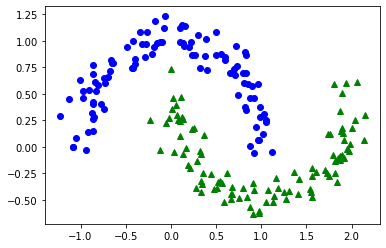

In [67]:
plt.plot(x[:,0][y == 0], x[:,1][y == 0], 'bo')
plt.plot(x[:,0][y == 1], x[:,1][y == 1], 'g^')
plt.show()

In [68]:
def plot_dataset(x,y, axes):
    plt.plot(x[:,0][y == 0], x[:,1][y == 0], 'bo')
    plt.plot(x[:,0][y == 1], x[:,1][y == 1], 'g^')
    plt.grid(True)
    plt.xlabel('X', fontsize = 20)
    plt.ylabel('y', fontsize = 20, rotation = 0)
    plt.axis(axes)

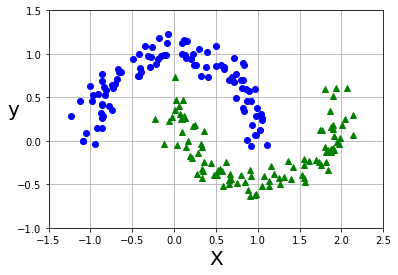

In [69]:
plot_dataset(x,y,[-1.5,2.5,-1,1.5])

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

In [71]:
# poly_features = PolynomialFeatures(degree = 3)
polynomial_svc_clf = Pipeline([('polynomial', PolynomialFeatures(degree = 3)),
                               ('scaler', StandardScaler()),
                               ('svc_clf', LinearSVC(C= 10, loss = 'hinge'))
                               ])

In [72]:
polynomial_svc_clf.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svc_clf', LinearSVC(C=10, loss='hinge'))])

In [99]:
def polt_prediction(clf,axes):
    x0 = np.linspace(axes[0], axes[1],100)
    x1 = np.linspace(axes[2], axes[3],100)
    x0, x1 = np.meshgrid(x0,x1)
    x_final = np.c_[x0.ravel(),x1.ravel()]
    pred = clf.predict(x_final).reshape(x0.shape)
    decision = clf.decision_function(x_final).reshape(x0.shape)
    plt.contourf(x0,x1,pred,cmap = plt.cm.brg, alpha = 0.2)
    plt.contourf(x0,x1,decision, cmap = plt.cm.brg, alpha = 0.1)

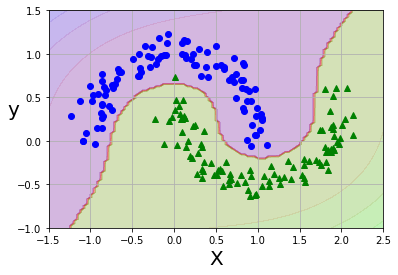

In [100]:
polt_prediction(polynomial_svc_clf, [-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.show()